# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='rainbow')
%matplotlib inline

In [2]:
# Importing Data

df= pd.read_excel('online_course_recommendation_v2.xlsx')
df

user_id  course_id                           course_name  \
0        15796       9366                  Python for Beginners   
1          861       1928       Cybersecurity for Professionals   
2        38159       9541      DevOps and Continuous Deployment   
3        44733       3708       Project Management Fundamentals   
4        11285       3361           Ethical Hacking Masterclass   
...        ...        ...                                   ...   
99995    10647       5466             Graphic Design with Canva   
99996    13800       2623   Stock Market and Trading Strategies   
99997    47131       1556  Networking and System Administration   
99998    49654       6001             Graphic Design with Canva   
99999    12929       5763             Graphic Design with Canva   

            instructor  course_duration_hours certification_offered  \
0          Emma Harris                   39.1                   Yes   
1      Alexander Young                   36.3                   Yes   
2       Dr. Mia Walker                   13.4                   Yes   
3       Benjamin Lewis                   58.3                   Yes   
4         Daniel White                   30.8                   Yes   
...                ...                    ...                   ...   
99995      Emma Harris                   17.3                   Yes   
99996   Dr. John Smith                   68.4                   Yes   
99997   Dr. John Smith                   73.8                   Yes   
99998     Daniel White                   30.3                   Yes   
99999     Daniel White                   67.0                    No   

      difficulty_level  rating  enrollment_numbers  course_price  \
0             Beginner     5.0               21600        317.50   
1             Beginner     4.3               15379         40.99   
2             Beginner     3.9                6431        380.81   
3             Beginner     3.1               48245        342.80   
4             Beginner     2.8               34556        381.01   
...                ...     ...                 ...           ...   
99995         Beginner     3.9               49101        485.34   
99996         Beginner     3.5               35107        162.80   
99997         Beginner     4.3               12146         24.02   
99998         Beginner     3.5                9933        402.24   
99999         Beginner     2.3                3479        135.61   

       feedback_score study_material_available  time_spent_hours  \
0               0.797                      Yes             17.60   
1               0.770                      Yes             28.97   
2               0.772                      Yes             52.44   
3               0.969                       No             22.29   
4               0.555                      Yes             22.01   
...               ...                      ...               ...   
99995           0.838                      Yes             16.35   
99996           0.922                      Yes             41.94   
99997           0.990                      Yes             15.87   
99998           0.630                      Yes             21.05   
99999           0.753                      Yes              8.63   

       previous_courses_taken  
0                           4  
1                           9  
2                           4  
3                           6  
4                           5  
...                       ...  
99995                       3  
99996                       7  
99997                       5  
99998                       4  
99999                       1  

[100000 rows x 14 columns]

# Data preprocessing

In [3]:
df.describe()

user_id      course_id  course_duration_hours         rating  \
count  100000.000000  100000.000000           100000.00000  100000.000000   
mean    24935.663570    5006.863560               52.38354       3.959859   
std     14406.960108    2882.085456               27.42347       0.729958   
min         1.000000       1.000000                5.00000       1.000000   
25%     12487.750000    2523.000000               28.60000       3.500000   
50%     24793.500000    5012.000000               52.40000       4.000000   
75%     37382.250000    7502.000000               76.10000       4.500000   
max     49999.000000    9999.000000              100.00000       5.000000   

       enrollment_numbers   course_price  feedback_score  time_spent_hours  \
count       100000.000000  100000.000000   100000.000000     100000.000000   
mean         25052.822850     261.073369        0.746865         20.691054   
std          14388.188356     139.013758        0.143683         13.669148   
min             50.000000      20.000000        0.092000          1.000000   
25%          12583.750000     140.100000        0.649000          9.900000   
50%          25057.500000     262.310000        0.750000         19.920000   
75%          37522.000000     381.702500        0.851000         30.080000   
max          49999.000000     500.000000        1.000000         84.150000   

       previous_courses_taken  
count           100000.000000  
mean                 4.992670  
std                  2.237259  
min                  0.000000  
25%                  3.000000  
50%                  5.000000  
75%                  6.000000  
max                 19.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [5]:
df.shape

(100000, 14)

In [6]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

### Identifies possible values in key categorical features.

In [8]:
df['difficulty_level'].unique()

array(['Beginner', 'Advanced', 'Intermediate'], dtype=object)

In [9]:
df['certification_offered'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['study_material_available'].unique()

array(['Yes', 'No'], dtype=object)

### Shows frequency distribution of categories.

In [11]:
df['certification_offered'].value_counts()

certification_offered
Yes    70059
No     29941
Name: count, dtype: int64

In [12]:
df['difficulty_level'].value_counts()

difficulty_level
Beginner        49877
Intermediate    29899
Advanced        20224
Name: count, dtype: int64

In [13]:
df['study_material_available'].value_counts()

study_material_available
Yes    85147
No     14853
Name: count, dtype: int64

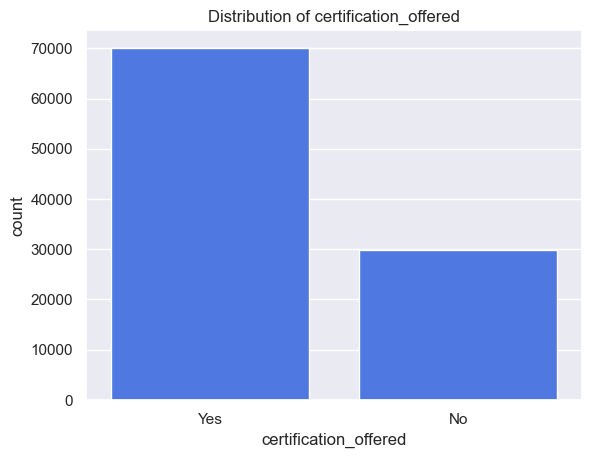

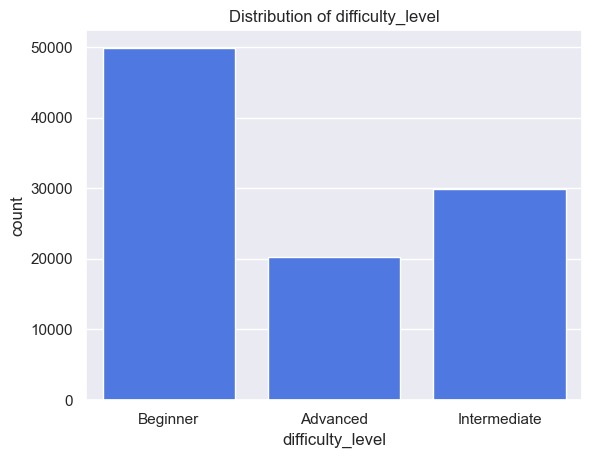

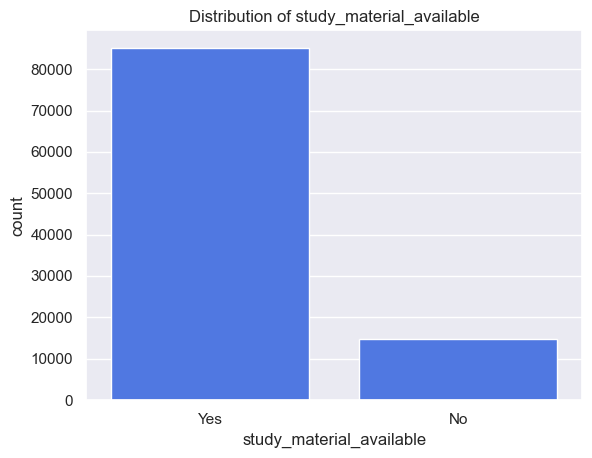

In [14]:
# Uses count plots to visualize distribution of categories.
categorical_cols = ['certification_offered', 'difficulty_level', 'study_material_available']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

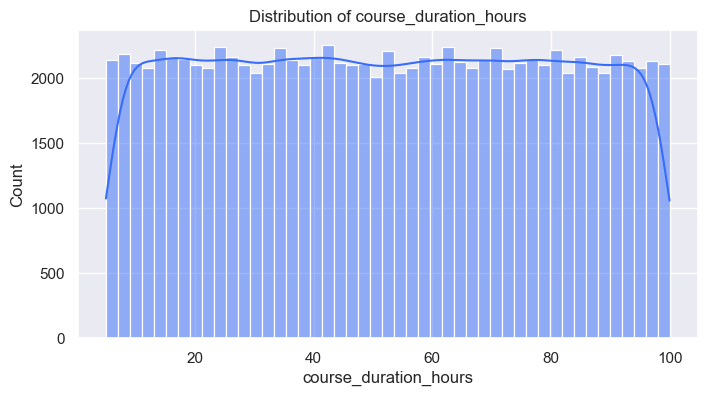

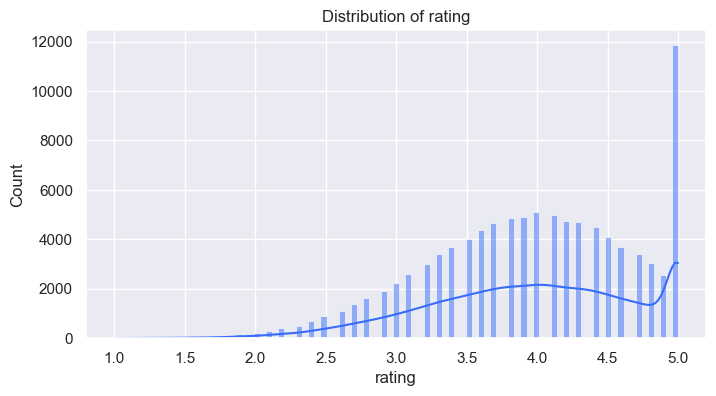

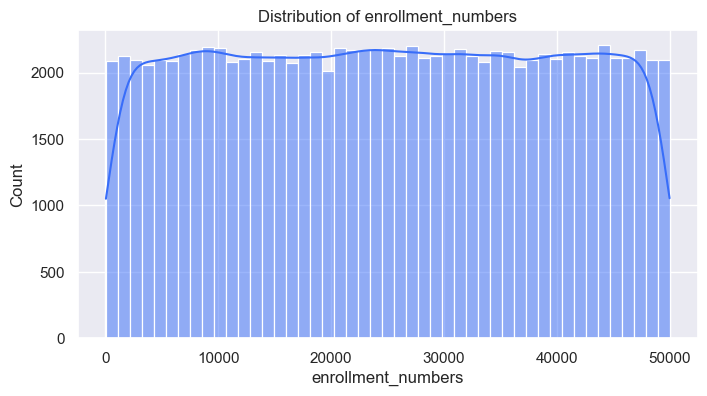

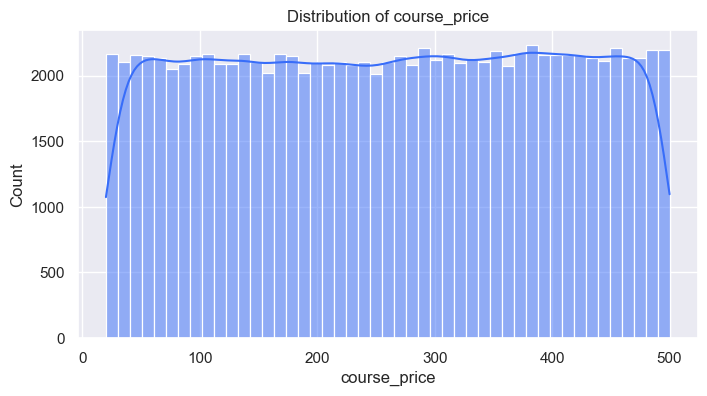

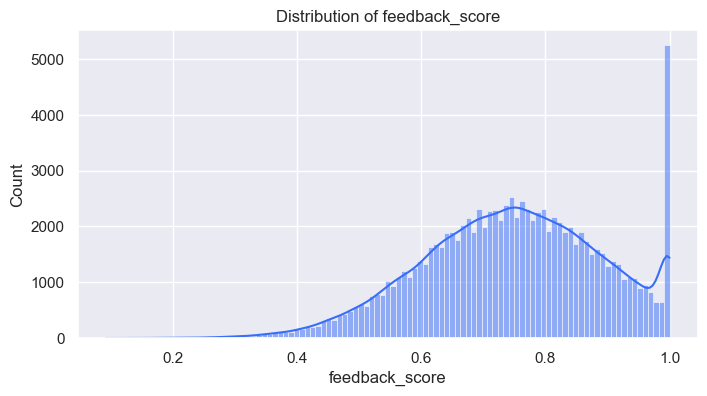

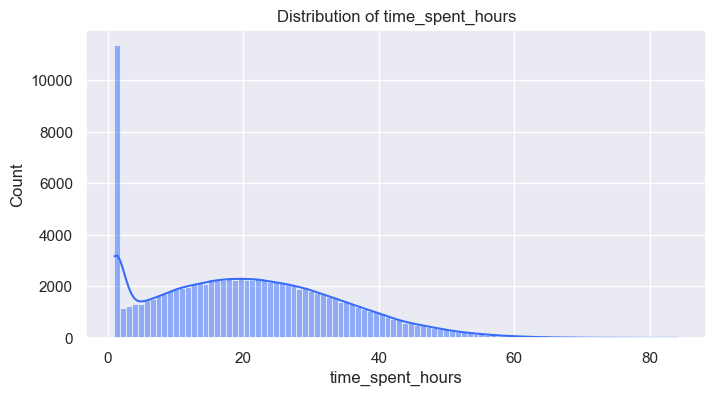

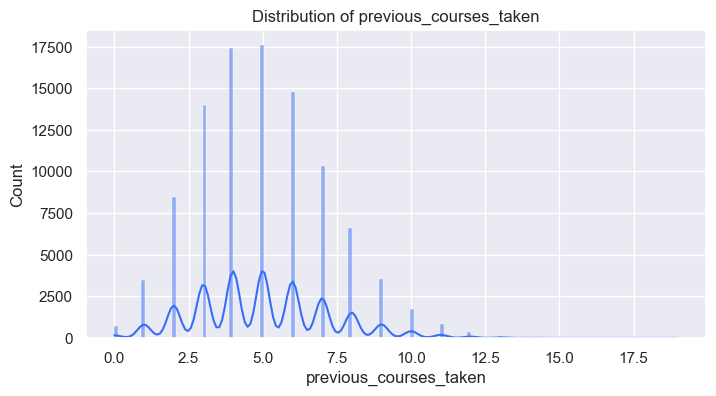

In [15]:
#Plots histogram with KDE (smooth curve) for each numerical column.
numerical_cols = ['course_duration_hours', 'rating', 'enrollment_numbers',
                  'course_price', 'feedback_score', 'time_spent_hours', 'previous_courses_taken']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

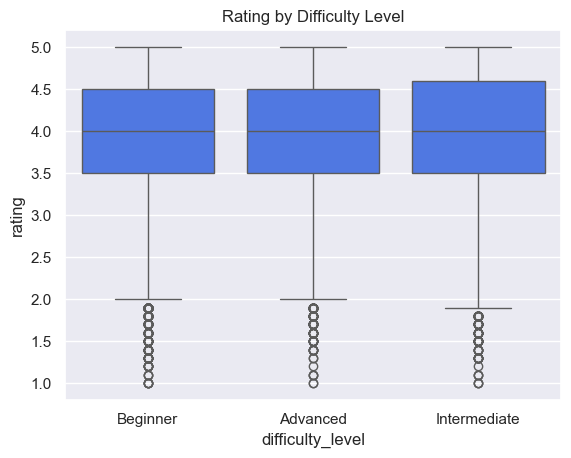

In [16]:
# Shows how ratings and feedback vary with categorical attributes.
sns.boxplot(data=df, x='difficulty_level', y='rating')
plt.title("Rating by Difficulty Level")
plt.show()

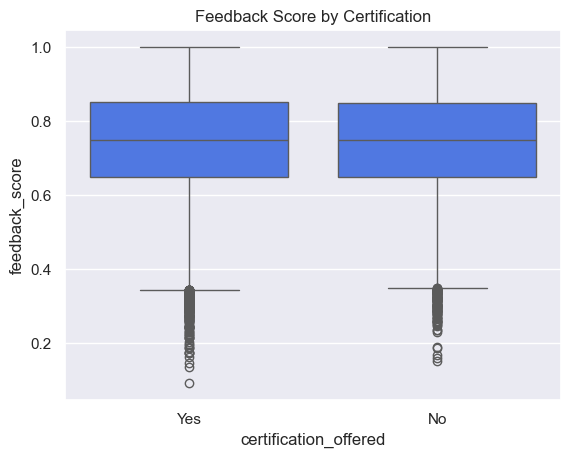

In [17]:
# Certification vs Feedback Score
sns.boxplot(data=df, x='certification_offered', y='feedback_score')
plt.title("Feedback Score by Certification")
plt.show()

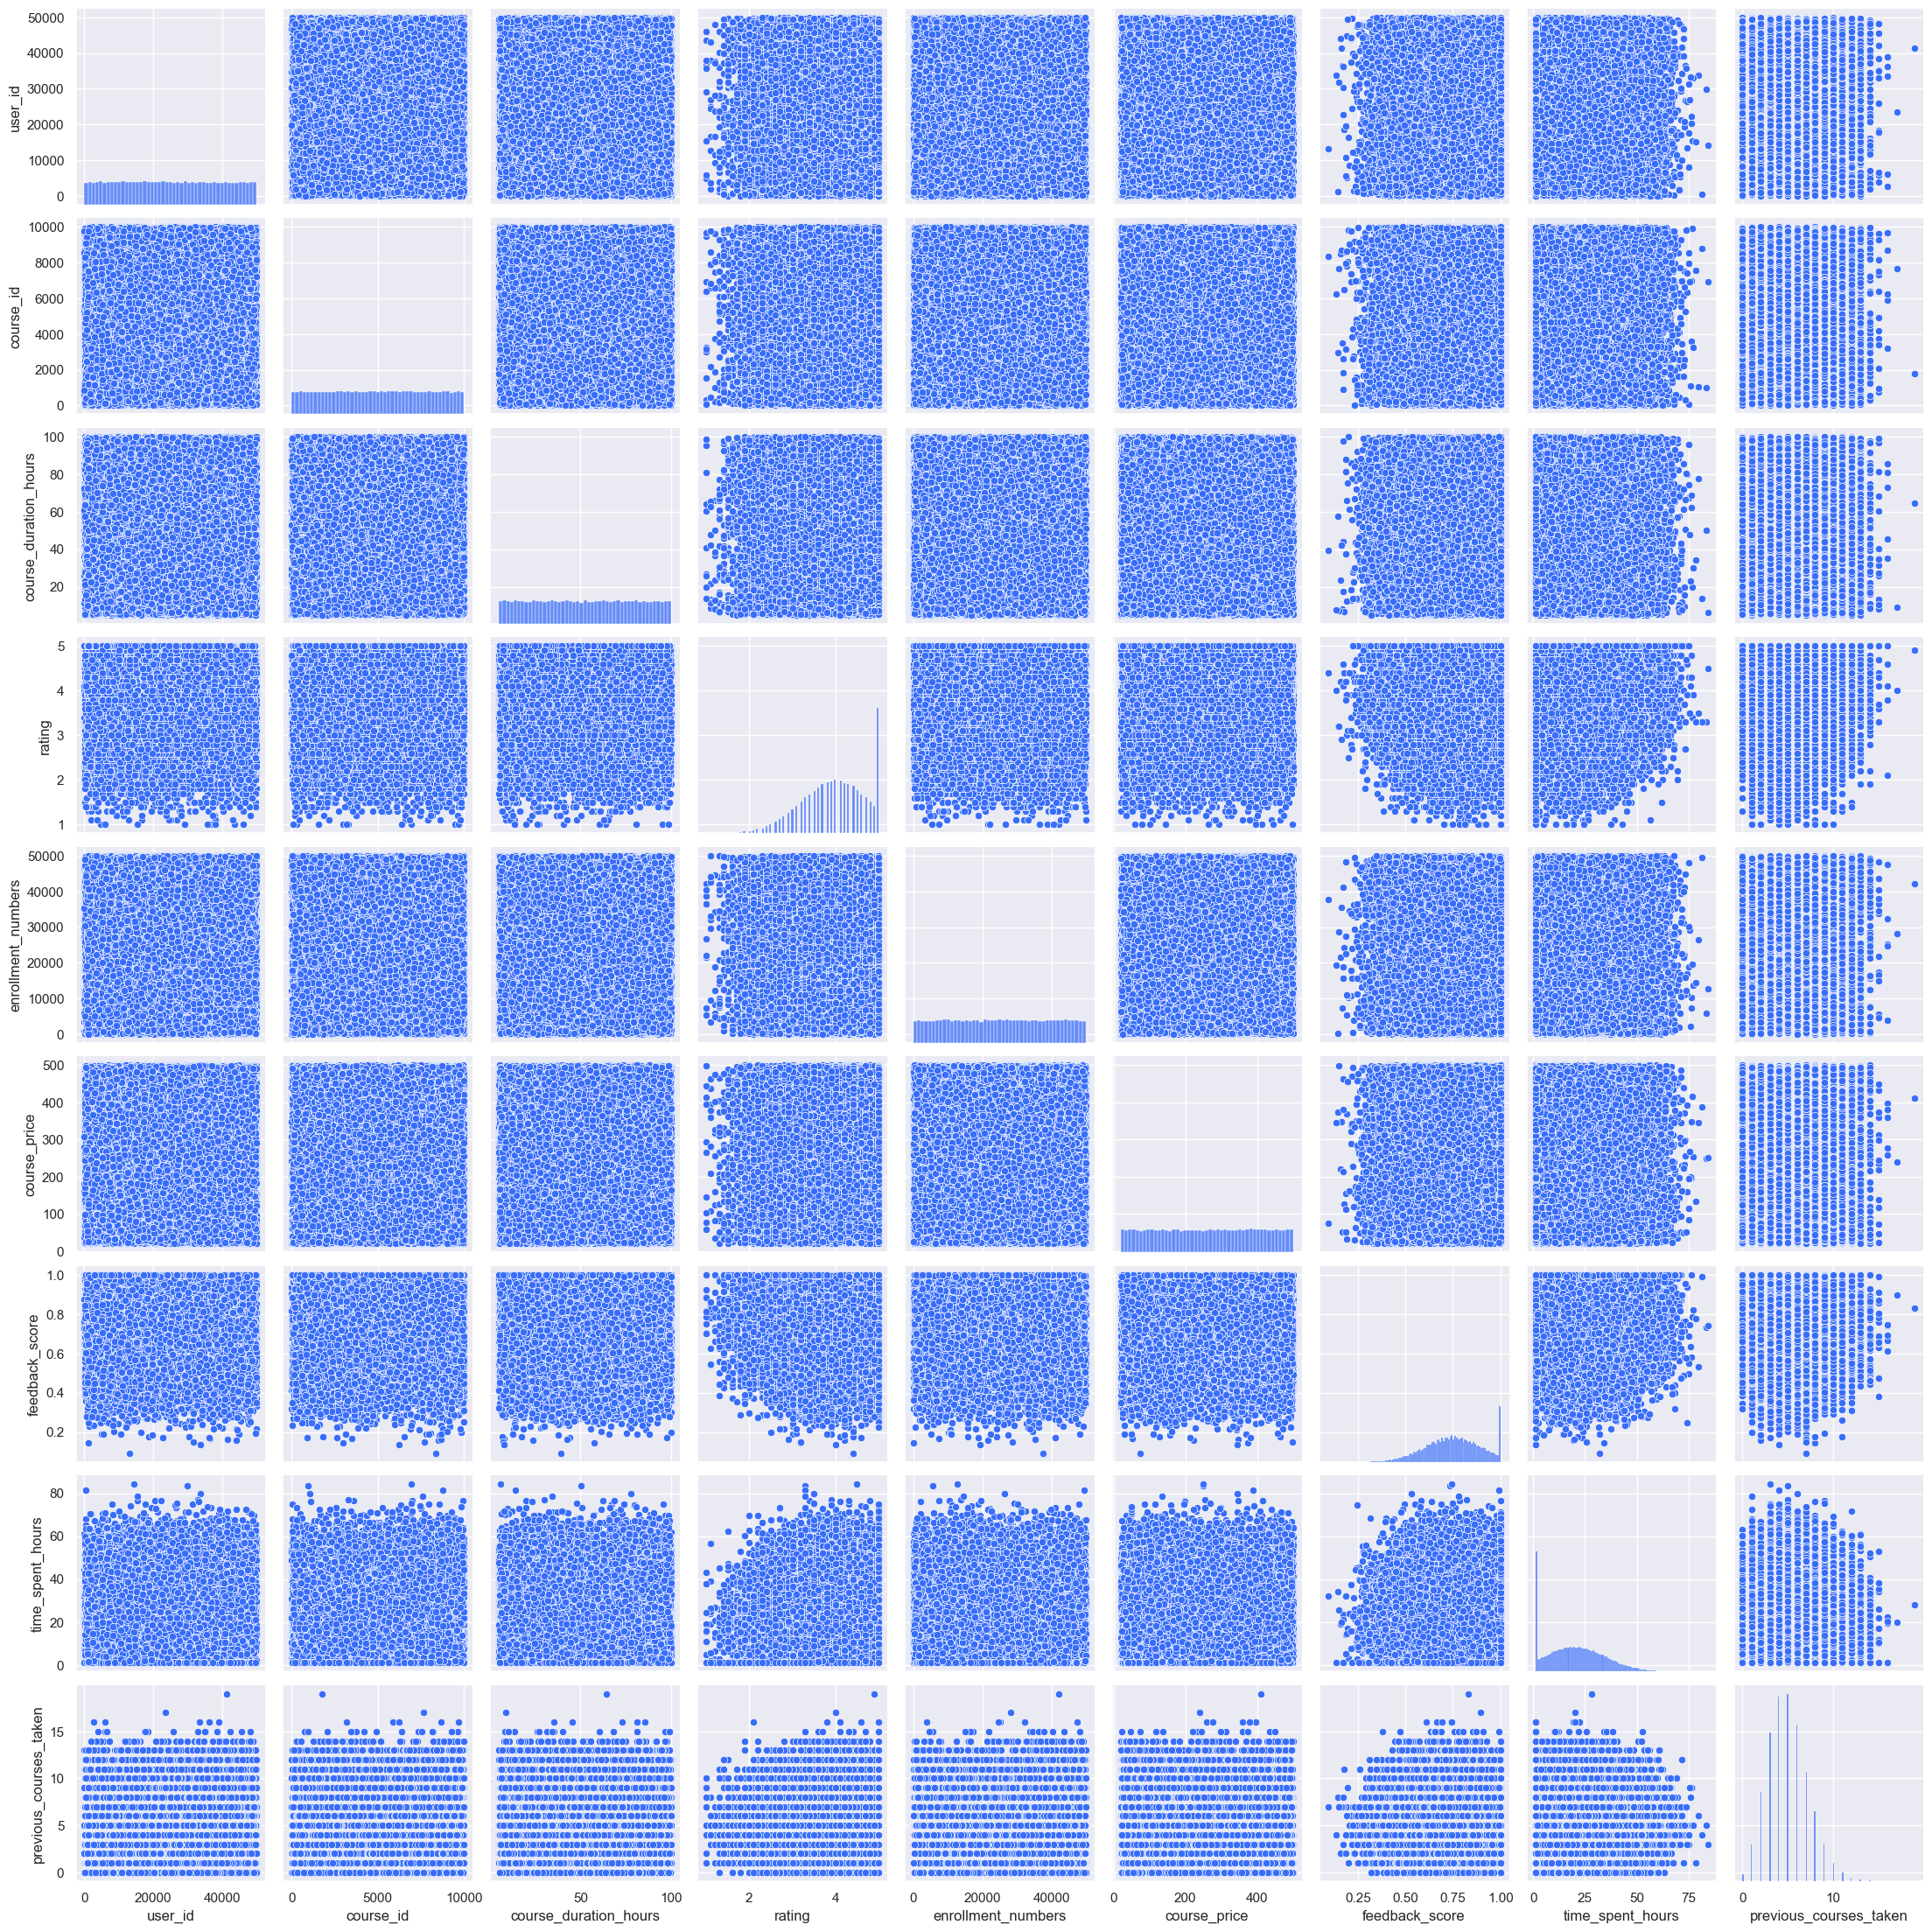

In [18]:
# Visualizes pairwise relationships between numerical variables.
sns.pairplot(df)
plt.show()

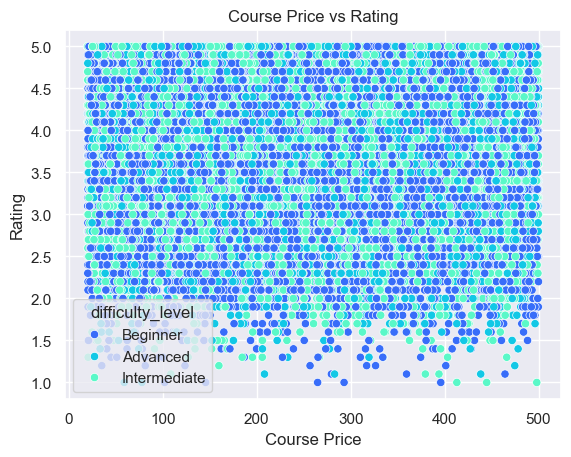

In [19]:
#Shows if there's a trend (e.g., do higher priced courses get better ratings?).
sns.scatterplot(data=df, x='course_price', y='rating', hue='difficulty_level')
plt.title('Course Price vs Rating')
plt.xlabel('Course Price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


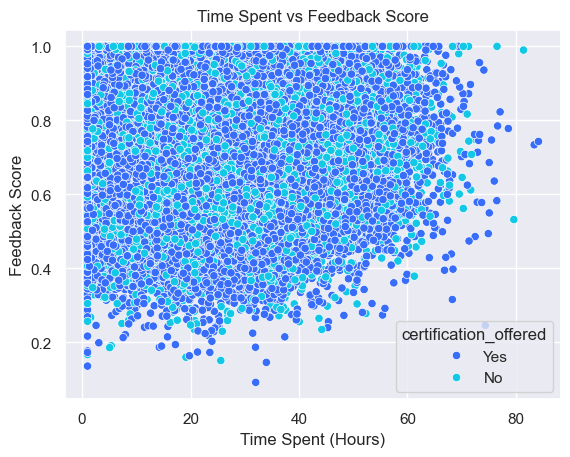

In [20]:
#You can analyze engagement vs. satisfaction.Might reveal if certification leads to more positive feedback.
sns.scatterplot(data=df, x='time_spent_hours', y='feedback_score', hue='certification_offered')
plt.title('Time Spent vs Feedback Score')
plt.xlabel('Time Spent (Hours)')
plt.ylabel('Feedback Score')
plt.grid(True)
plt.show()


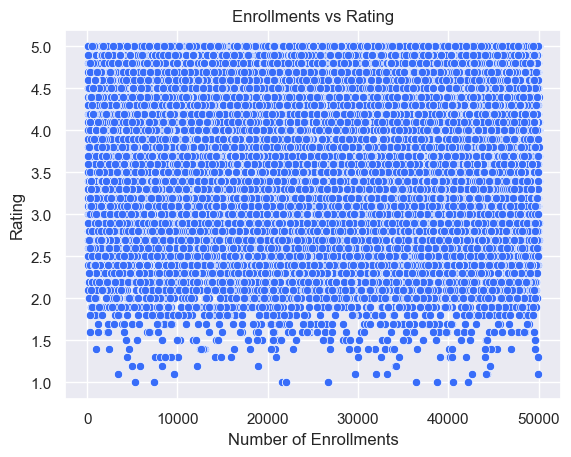

In [21]:
#Do popular (high-enrollment) courses have higher ratings Or are niche courses rated better
sns.scatterplot(data=df, x='enrollment_numbers', y='rating')
plt.title('Enrollments vs Rating')
plt.xlabel('Number of Enrollments')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


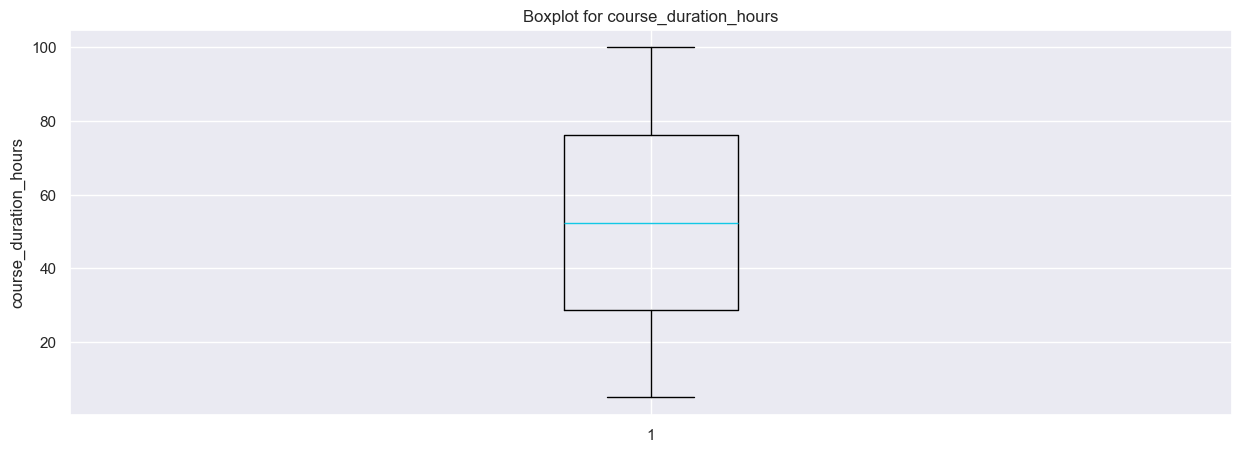

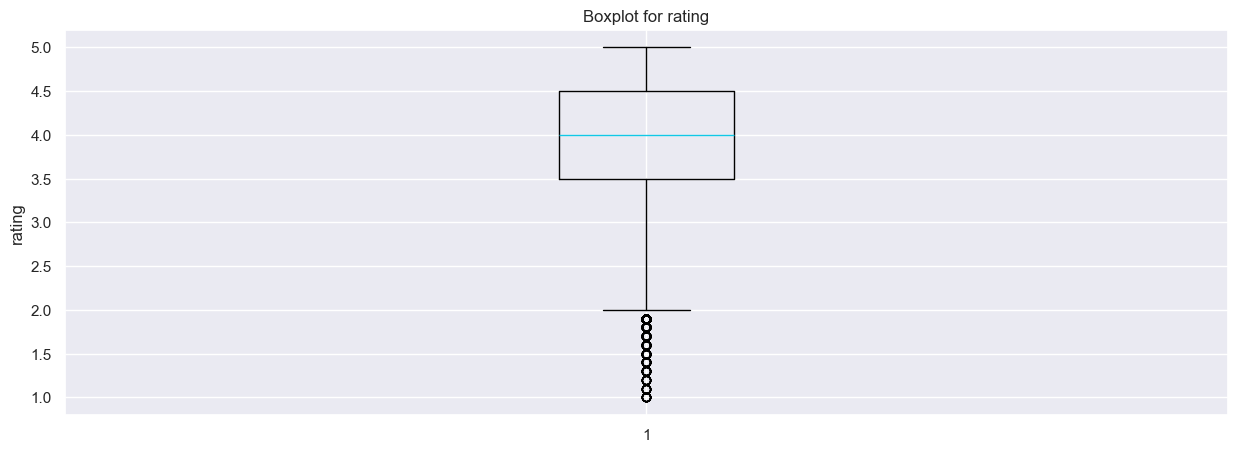

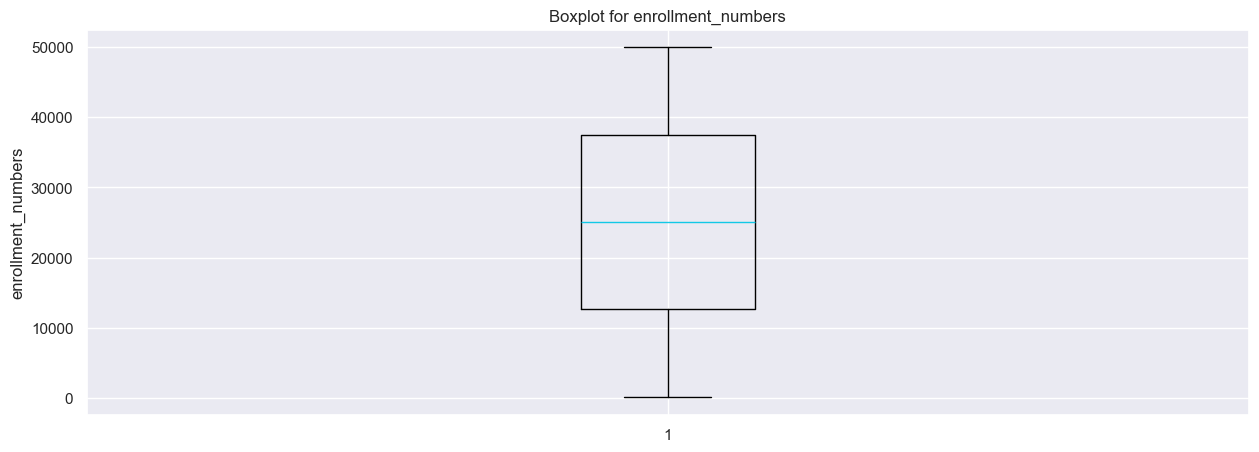

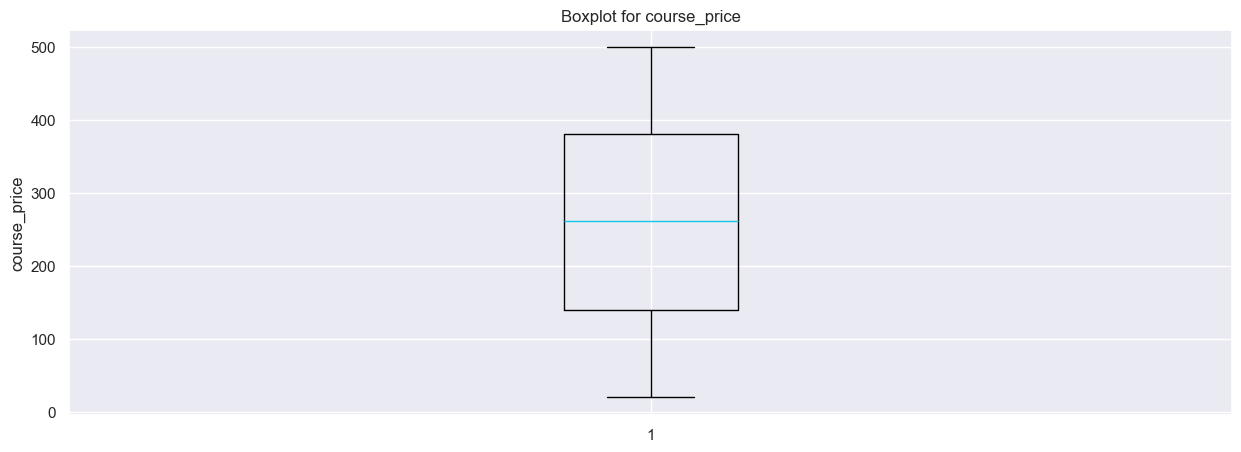

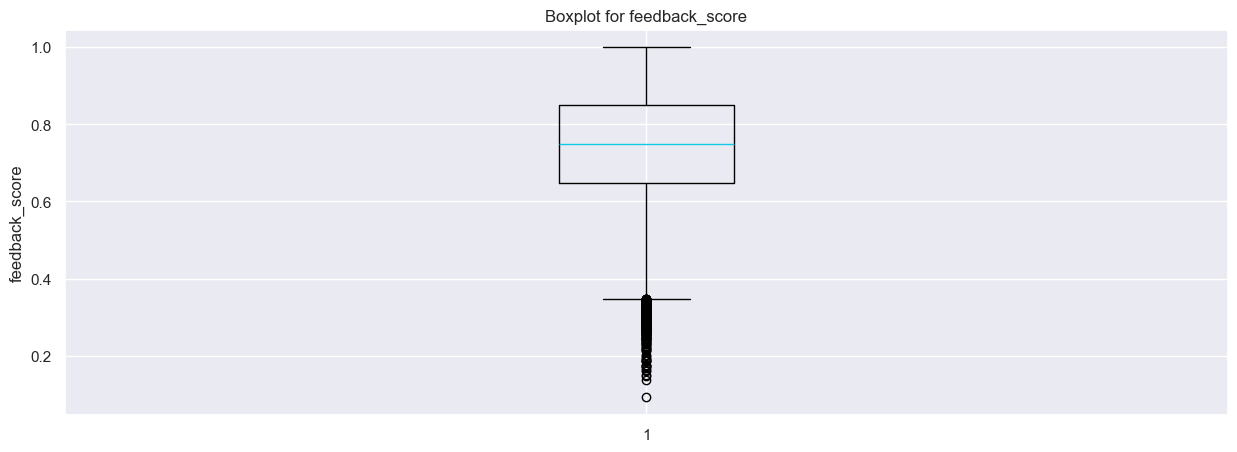

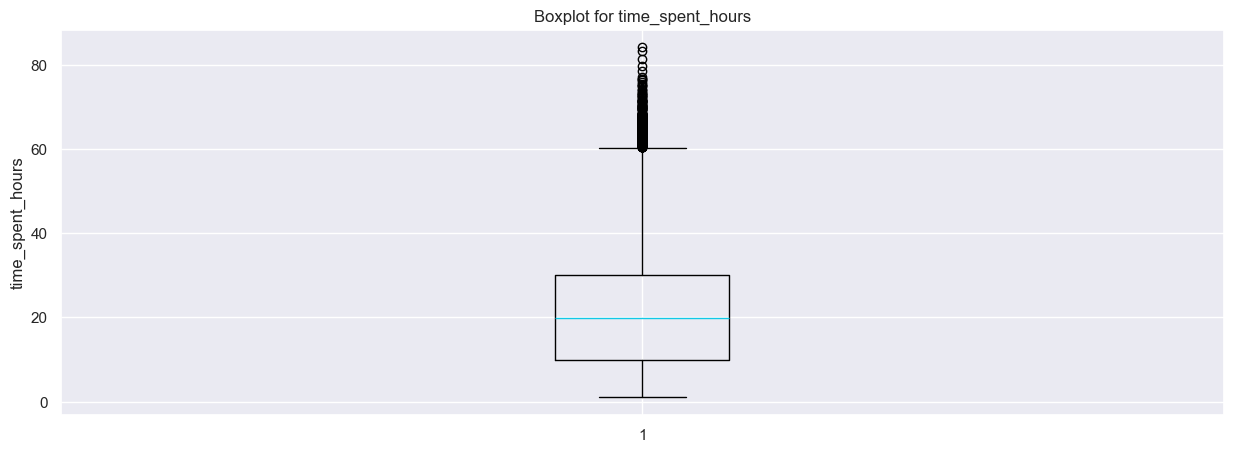

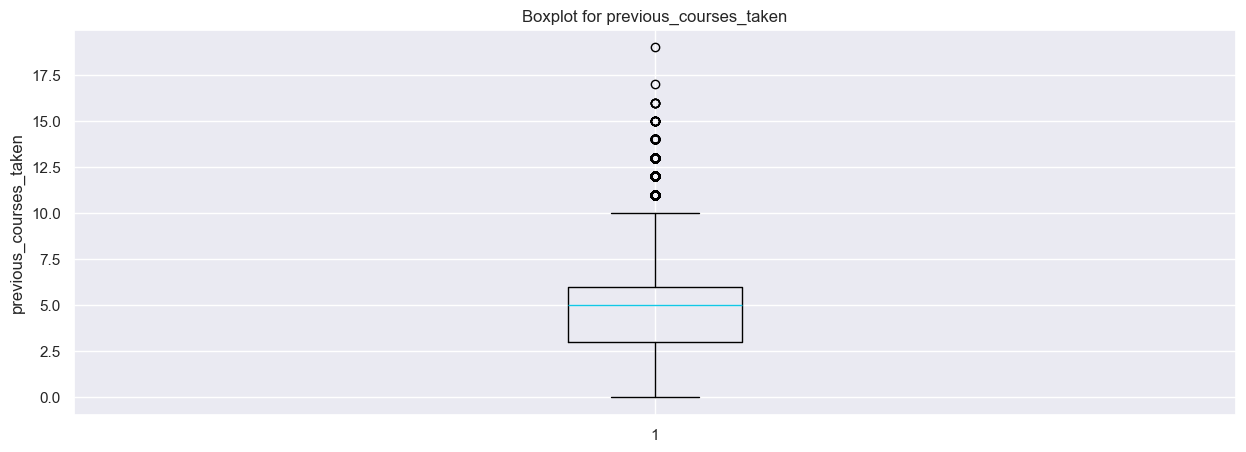

In [22]:
# checking Outlines
for col in numerical_cols:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.ylabel(col)
    plt.show()

In [23]:
#outlier Detection
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df        

In [24]:
outlier_Detection(df,['rating','feedback_score','time_spent_hours','previous_courses_taken'])

user_id  course_id                           course_name  \
0        15796       9366                  Python for Beginners   
1          861       1928       Cybersecurity for Professionals   
2        38159       9541      DevOps and Continuous Deployment   
3        44733       3708       Project Management Fundamentals   
4        11285       3361           Ethical Hacking Masterclass   
...        ...        ...                                   ...   
99995    10647       5466             Graphic Design with Canva   
99996    13800       2623   Stock Market and Trading Strategies   
99997    47131       1556  Networking and System Administration   
99998    49654       6001             Graphic Design with Canva   
99999    12929       5763             Graphic Design with Canva   

            instructor  course_duration_hours certification_offered  \
0          Emma Harris                   39.1                   Yes   
1      Alexander Young                   36.3                   Yes   
2       Dr. Mia Walker                   13.4                   Yes   
3       Benjamin Lewis                   58.3                   Yes   
4         Daniel White                   30.8                   Yes   
...                ...                    ...                   ...   
99995      Emma Harris                   17.3                   Yes   
99996   Dr. John Smith                   68.4                   Yes   
99997   Dr. John Smith                   73.8                   Yes   
99998     Daniel White                   30.3                   Yes   
99999     Daniel White                   67.0                    No   

      difficulty_level  rating  enrollment_numbers  course_price  \
0             Beginner     5.0               21600        317.50   
1             Beginner     4.3               15379         40.99   
2             Beginner     3.9                6431        380.81   
3             Beginner     3.1               48245        342.80   
4             Beginner     2.8               34556        381.01   
...                ...     ...                 ...           ...   
99995         Beginner     3.9               49101        485.34   
99996         Beginner     3.5               35107        162.80   
99997         Beginner     4.3               12146         24.02   
99998         Beginner     3.5                9933        402.24   
99999         Beginner     2.3                3479        135.61   

       feedback_score study_material_available  time_spent_hours  \
0               0.797                      Yes             17.60   
1               0.770                      Yes             28.97   
2               0.772                      Yes             52.44   
3               0.969                       No             22.29   
4               0.555                      Yes             22.01   
...               ...                      ...               ...   
99995           0.838                      Yes             16.35   
99996           0.922                      Yes             41.94   
99997           0.990                      Yes             15.87   
99998           0.630                      Yes             21.05   
99999           0.753                      Yes              8.63   

       previous_courses_taken  
0                         4.0  
1                         9.0  
2                         4.0  
3                         6.0  
4                         5.0  
...                       ...  
99995                     3.0  
99996                     7.0  
99997                     5.0  
99998                     4.0  
99999                     1.0  

[100000 rows x 14 columns]

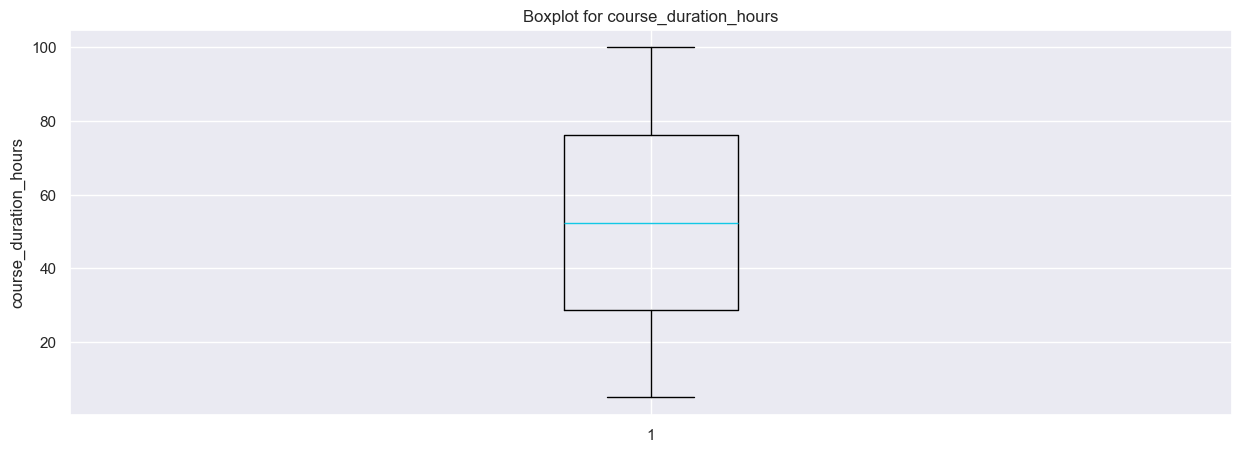

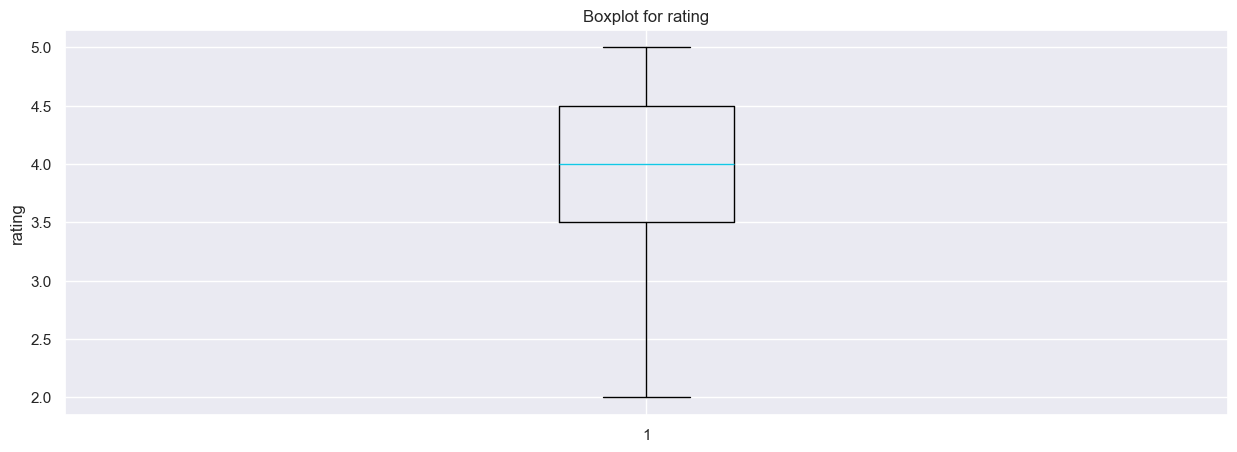

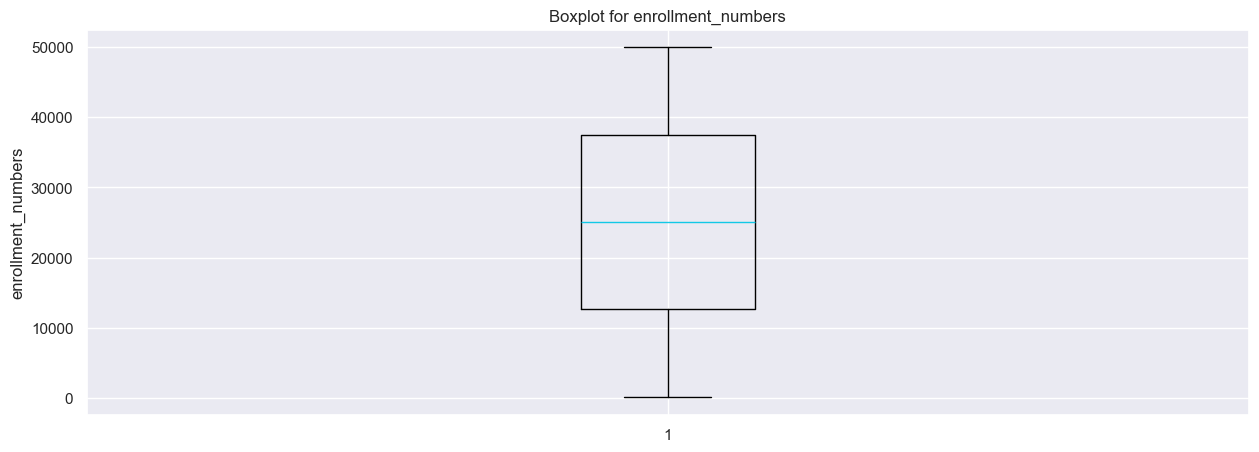

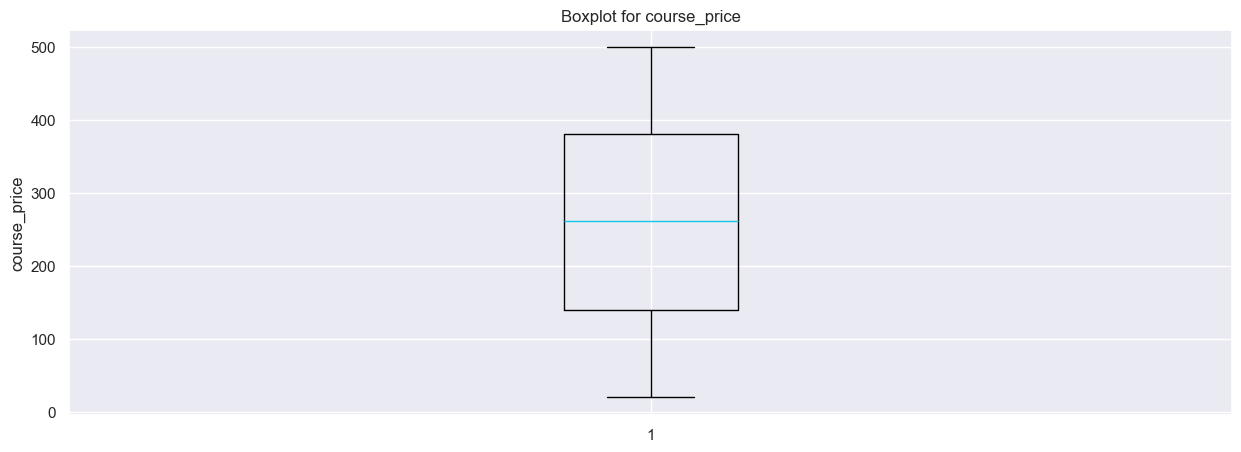

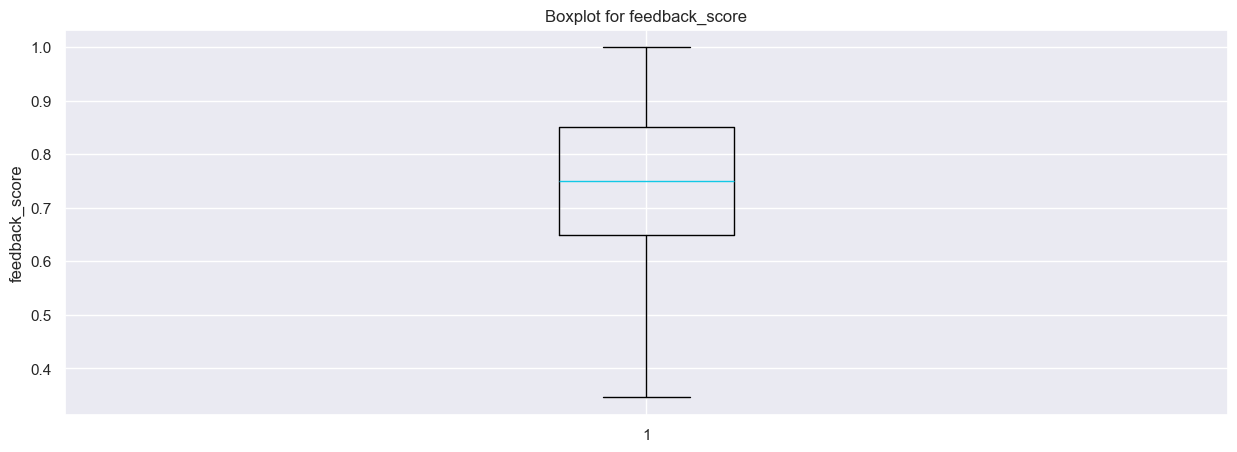

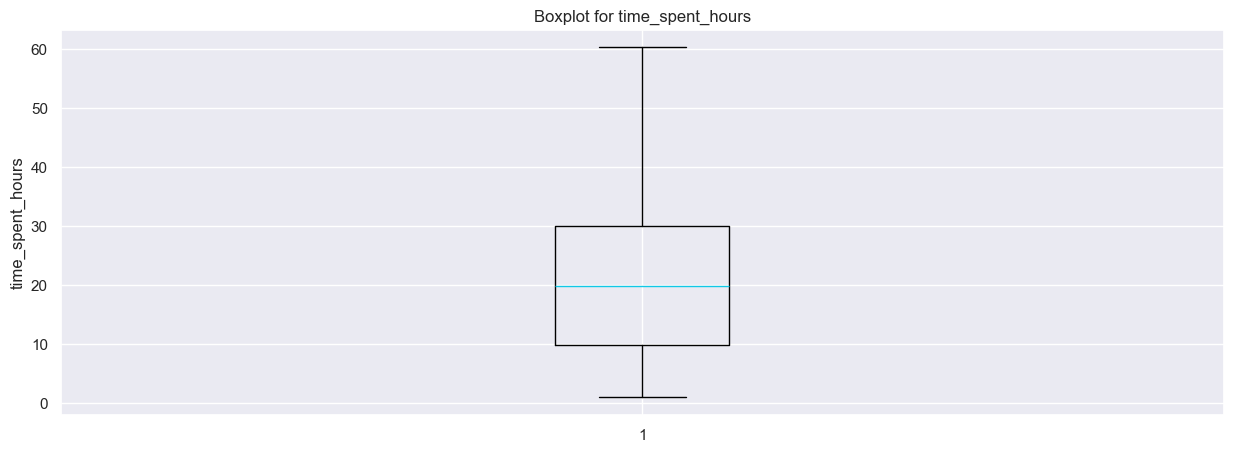

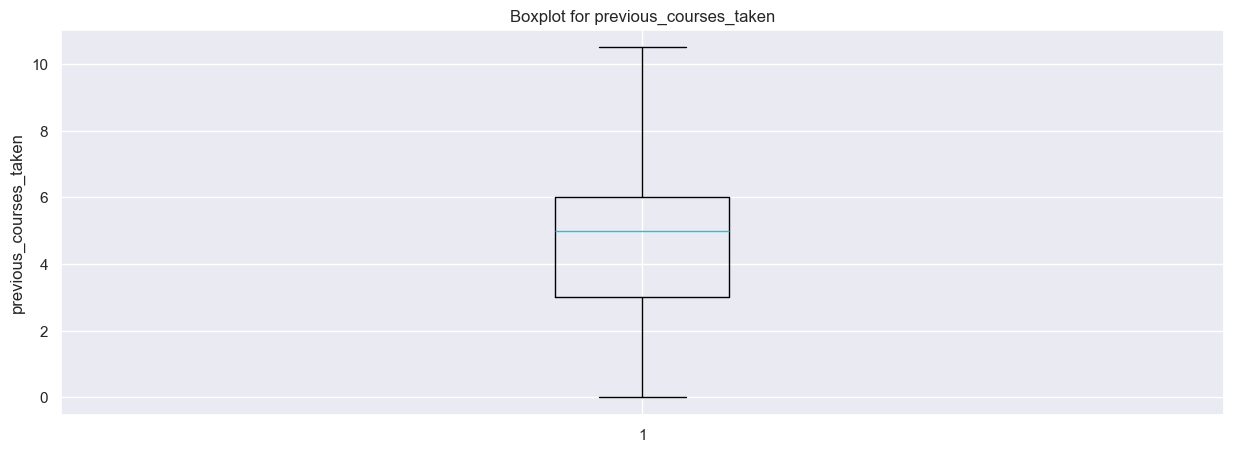

In [25]:
# After Outlier Detection
for column in numerical_cols:
    plt.figure(figsize=(15,5))  # Create a new figure for each plot
    plt.boxplot(df[column])
    plt.title(f"Boxplot for {column}")
    plt.ylabel(column)
    plt.show()

In [26]:
df[numerical_cols].corr()

course_duration_hours    rating  enrollment_numbers  \
course_duration_hours                1.000000  0.001426           -0.000591   
rating                               0.001426  1.000000           -0.000977   
enrollment_numbers                  -0.000591 -0.000977            1.000000   
course_price                         0.002784 -0.001491            0.000441   
feedback_score                       0.001683  0.001492            0.001623   
time_spent_hours                    -0.001783  0.001845            0.000507   
previous_courses_taken              -0.001999  0.000527           -0.000374   

                        course_price  feedback_score  time_spent_hours  \
course_duration_hours       0.002784        0.001683         -0.001783   
rating                     -0.001491        0.001492          0.001845   
enrollment_numbers          0.000441        0.001623          0.000507   
course_price                1.000000        0.004075         -0.002828   
feedback_score              0.004075        1.000000          0.000695   
time_spent_hours           -0.002828        0.000695          1.000000   
previous_courses_taken      0.000695       -0.001462          0.002987   

                        previous_courses_taken  
course_duration_hours                -0.001999  
rating                                0.000527  
enrollment_numbers                   -0.000374  
course_price                          0.000695  
feedback_score                       -0.001462  
time_spent_hours                      0.002987  
previous_courses_taken                1.000000

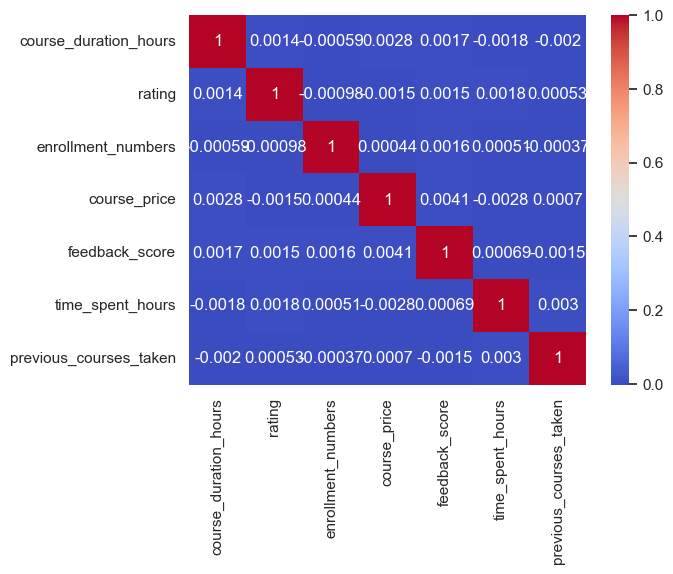

In [27]:
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

## Model Building

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_score, recall_score, f1_score


In [29]:
# Encode categorical variables
le_course = LabelEncoder()
df['course_name_enc'] = le_course.fit_transform(df['course_name'])
df['instructor_enc'] = LabelEncoder().fit_transform(df['instructor'])
df['difficulty_enc'] = LabelEncoder().fit_transform(df['difficulty_level'])
df['material_enc'] = LabelEncoder().fit_transform(df['study_material_available'])


In [30]:
# Normalize numeric features
features_to_scale = ['course_duration_hours', 'course_price', 'rating',
                     'feedback_score', 'time_spent_hours', 'previous_courses_taken', 'enrollment_numbers']
scaler_full = MinMaxScaler()
df[features_to_scale] = scaler_full.fit_transform(df[features_to_scale])


In [31]:
# Use reduced features for similarity to avoid memory overload
similarity_features = ['enrollment_numbers', 'previous_courses_taken', 'time_spent_hours']
scaler_similarity = MinMaxScaler()
df[similarity_features] = scaler_similarity.fit_transform(df[similarity_features])


In [32]:
# Popularity-Based Recommendation
def get_popular_courses(df, top_n=5):
    return df.nlargest(top_n, 'enrollment_numbers')[['course_name', 'enrollment_numbers']]


In [33]:
# Content-Based Filtering
def get_similar_courses_based_on_input(enrollment, interest, engagement, top_n=5):
    user_input = np.array([[enrollment, interest, engagement]])
    user_input_scaled = scaler_similarity.transform(user_input)
    similarities = cosine_similarity(user_input_scaled, df[similarity_features].values).flatten()
    top_indices = np.argsort(similarities)[-top_n:][::-1]
    return df.iloc[top_indices][['course_id', 'course_name', 'enrollment_numbers', 'rating']]


In [34]:
# Based on Enrollment IDs
def recommend_based_on_enrollment_ids(enrollment_ids):
    print("Top 5 Popular Courses:")
    print(get_popular_courses(df))
    for eid in enrollment_ids:
        if eid in df['course_id'].values:
            row = df[df['course_id'] == eid][similarity_features].iloc[0]
            print(f"\nBased on course ID {eid}:")
            print(get_similar_courses_based_on_input(*row))
        else:
            print(f"\nEnrollment ID {eid} not found in dataset.")


In [35]:
# Based on User Preferences
def recommend_based_on_user_preferences(enrollment, interest, engagement):
    print("\nTop 5 Personalized Courses:")
    print(get_similar_courses_based_on_input(enrollment, interest, engagement))


In [36]:
# KNN-Based Recommendation
def knn_recommendation(course_id, top_n=5):
    feature_cols = similarity_features + ['rating', 'feedback_score']
    knn = NearestNeighbors(metric='cosine').fit(df[feature_cols])
    if course_id in df['course_id'].values:
        idx = df[df['course_id'] == course_id].index[0]
        _, indices = knn.kneighbors([df.loc[idx, feature_cols]], n_neighbors=top_n+1)
        return df.iloc[indices[0][1:]][['course_id', 'course_name', 'rating']]
    return f"Course ID {course_id} not found."


In [37]:
# Hybrid Recommendation (optimized to avoid large merge)
def hybrid_recommendation(enrollment, interest, engagement, top_n=5):
    content_df = get_similar_courses_based_on_input(enrollment, interest, engagement, top_n=top_n*2)
    content_df = content_df.merge(df[['course_name', 'enrollment_numbers']], on='course_name', how='left')
    content_df['score'] = 0.5 * content_df['enrollment_numbers_x'] + 0.5 * content_df['enrollment_numbers_y']
    return content_df.sort_values('score', ascending=False).head(top_n)[['course_id', 'course_name', 'score']]


In [42]:
# Utility-Based Recommendation
def utility_based_recommendation(top_n=5):
    df['utility_score'] = df['rating'] / (df['course_price'] + 1e-6)
    return df.nlargest(top_n, 'utility_score')[['course_id', 'course_name', 'utility_score']]


In [38]:
# Knowledge-Based Recommendation
def knowledge_based_recommendation(material_available=1, difficulty='Intermediate'):
    return df[(df['material_enc'] == material_available) & (df['difficulty_level'] == difficulty)][['course_id', 'course_name']]


In [39]:
def mock_evaluation(true_courses, recommended_courses):
    all_courses = df['course_id'].unique().tolist()
    y_true = [1 if course in true_courses else 0 for course in all_courses]
    y_pred = [1 if course in recommended_courses else 0 for course in all_courses]
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return precision, recall, f1

In [40]:
def evaluate_models():
    print("\n--- Evaluation Metrics for Models ---")
    true_relevant = df.nlargest(10, 'rating')['course_id'].tolist()

    models = {
        'Popularity-Based': get_popular_courses(df)['course_name'],
        'Content-Based': get_similar_courses_based_on_input(0.8, 0.6, 0.9)['course_name'],
        'KNN-Based': knn_recommendation(101)['course_name'],
        'Hybrid': hybrid_recommendation(0.8, 0.6, 0.9)['course_name'],
        'Utility-Based': utility_based_recommendation()['course_name'],
        'Knowledge-Based': knowledge_based_recommendation()['course_name']
    }

    all_f1_scores = []
    best_model = None
    best_f1 = -1
    best_recall = -1

    for model_name, courses in models.items():
        course_ids = df[df['course_name'].isin(courses)]['course_id'].tolist()
        p, r, f1 = mock_evaluation(true_relevant, course_ids)
        all_f1_scores.append(f1)
        print(f"{model_name}: Precision={p:.2f}, Recall={r:.2f}, F1-Score={f1:.2f}")
        if f1 > best_f1 or (f1 == best_f1 and r > best_recall):
            best_f1 = f1
            best_model = model_name
            best_recall = r
    if all(f == 0 for f in all_f1_scores):
        print("\n⚠️ Warning: All models returned F1-Score = 0. Evaluation may not be valid.")
        best_model = max(models.keys(), key=lambda m: recall_score(
            [1 if cid in true_relevant else 0 for cid in df['course_id']],
            [1 if cid in df[df['course_name'].isin(models[m])]['course_id'].tolist() else 0 for cid in df['course_id']],
            zero_division=0
        ))
        print(f"📌 Best Model According to Recall: {best_model}")
    else:
        print(f"\n✅ Best Model According to Evaluation: {best_model}")

In [43]:
# Run Example
sample_enrollment_ids = [101, 205, 309]
recommend_based_on_enrollment_ids(sample_enrollment_ids)

# Example user preferences (scaled):
recommend_based_on_user_preferences(0.8, 0.6, 0.9)

print("\nKNN-Based:")
print(knn_recommendation(101))

print("\nHybrid:")
print(hybrid_recommendation(0.8, 0.6, 0.9))

print("\nUtility-Based:")
print(utility_based_recommendation())

print("\nKnowledge-Based:")
print(knowledge_based_recommendation())

evaluate_models()

Top 5 Popular Courses:
                                course_name  enrollment_numbers
12428  Personal Finance and Wealth Building             1.00000
59090        Fitness and Nutrition Coaching             1.00000
77953     Fundamentals of Digital Marketing             1.00000
78898     Mobile App Development with Swift             1.00000
28112  Personal Finance and Wealth Building             0.99996

Based on course ID 101:
       course_id                        course_name  enrollment_numbers  \
916          101               Python for Beginners            0.834711   
42166       4787          Advanced Machine Learning            0.695690   
7752        2603               Python for Beginners            0.417426   
91172       3350  Mobile App Development with Swift            0.835032   
61798       9635  Mobile App Development with Swift            0.835072   

         rating  
916    0.733333  
42166  0.666667  
7752   0.700000  
91172  0.933333  
61798  1.000000  

Based on